In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path
from omegaconf import OmegaConf
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt

from cohlib.utils import  pickle_open

In [ ]:
def plot_eigvals_em_iters(ax, gamma_iter_list, gamma_init, j_ind=9, j_ind_full=9, nz=None):
    eigs = jnp.array([jnp.linalg.eigh(gamma_init[j_ind_full,:,:])[0]] + [jnp.linalg.eigh(gamma_r[j_ind,:,:])[0]  for gamma_r in gamma_iter_list])
    color = plt.cm.rainbow(jnp.linspace(0, 1, len(eigs)))
    for i, e in enumerate(eigs):
        ax.plot(e[::-1], color=color[i], linewidth=1)

In [3]:
def get_eigval(mat, rank):
    eigvals = jnp.linalg.eigh(mat)[0]
    return eigvals[-rank]

def get_eigvec(mat, rank):
    eigvecs = jnp.linalg.eigh(mat)[1]
    return eigvecs[:,-rank]

def plot_cross_spec_eigval_em_iters(ax, eigrank, gamma_iter_list, gamma_init, j_ind=9, j_ind_full=9, nz=None):
    eigs = jnp.array([get_eigval(gamma_init[j_ind_full,:,:], eigrank)] + [get_eigval(gamma_r[j_ind,:,:], eigrank) for gamma_r in gamma_iter_list])
    ax.plot(eigs, color='tab:blue', linewidth=2)

def get_eigvec_em_iters(eigrank, gamma_iter_list, gamma_init, j_ind=9, j_ind_full=9, nz=None):
    eigvecs = jnp.array([get_eigvec(gamma_init[j_ind_full,:,:], eigrank)] + [get_eigvec(gamma_r[j_ind,:,:], eigrank) for gamma_r in gamma_iter_list])
    return eigvecs

def plot_eigvec_func_em_iters(ax, func, eigrank, dim, gamma_iter_list, gamma_init, j_ind=9, nz=None, color='tab:blue'):
    eigvecs = get_eigvec_em_iters(eigrank, gamma_iter_list, gamma_init, j_ind, nz=nz)
    res = func(eigvecs[:,dim])
    ax.plot(res, color=color, linewidth=2)

In [4]:
def plot_cross_spec_em_iters(ax, i, j, gamma_iter_list, gamma_init, j_ind=9, j_ind_full=9, nz=None):
    cs_real = jnp.array([gamma_init[j_ind_full,i,j].real] + [gamma_r[j_ind,i,j].real for gamma_r in gamma_iter_list])
    cs_imag = jnp.array([gamma_init[j_ind_full,i,j].imag] + [gamma_r[j_ind,i,j].imag for gamma_r in gamma_iter_list])
    ax.plot(cs_real, color='tab:blue', linewidth=2)
    ax.plot(cs_imag, color='tab:red', linewidth=2)

def plot_cross_spec_func_em_iters(ax, func, i, j, gamma_iter_list, gamma_init, j_ind=9, j_ind_full=9, nz=None, color='tab:blue'):
    cs_real = jnp.array([func(gamma_init[j_ind_full,i,j])] + [func(gamma_r[j_ind,i,j]) for gamma_r in gamma_iter_list])
    ax.plot(cs_real, color=color, linewidth=2)

In [5]:
def plot_synthetic_data2(ax, obs, gamma, xs, zs, lams, trial, trial_color):
    title_size = 12
    label_size = 10
    x = jnp.arange(0, 1000) / 1000
    # for i in range(start,start+3):
    l = trial
    # i = 3
        
    ax[0].plot(x, lams[:,0,l], color=trial_color)
    ax[0].set_title(r'$\lambda_t^{1, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[0].margins(0)
    ax[0].set_ylabel('Intensity', size = label_size)

    ax[2].plot(x, lams[:,1,l], color=trial_color)
    ax[2].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[2].margins(0)
    ax[2].set_ylabel('Intensity', size = label_size)

    ax[1].plot(x, obs[:,0,l], color=trial_color)
    ax[1].set_title(r'$\lambda_t^{1, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[1].margins(0)
    ax[1].set_ylabel('Intensity', size = label_size)

    ax[3].plot(x, obs[:,1,l], color=trial_color)
    ax[3].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[3].margins(0)
    ax[3].set_ylabel('Intensity', size = label_size)


    ax[3].set_xlabel('Time (sec)', size = label_size)
    # plt.xlim([0,sample_length/fs])


In [6]:
def plot_synthetic_data(ax, obs, gamma, xs, zs, lams, trial, trial_color):
    title_size = 12
    label_size = 10
    x = jnp.arange(0, 1000) / 1000
    # for i in range(start,start+3):
    l = trial
    # i = 3
        
    ax[0].plot(x, lams[:,0,l], color=trial_color)
    ax[0].set_title(r'$\lambda_t^{1, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[0].margins(0)
    ax[0].set_ylabel('Intensity', size = label_size)

    ax[2].plot(x, lams[:,1,l], color=trial_color)
    ax[2].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[2].margins(0)
    ax[2].set_ylabel('Intensity', size = label_size)

    ax[4].plot(x, lams[:,2,l], color=trial_color)
    ax[4].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[4].margins(0)
    ax[4].set_ylabel('Intensity', size = label_size)

    ax[1].plot(x, obs[:,0,l], color=trial_color)
    ax[1].set_title(r'$\lambda_t^{1, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[1].margins(0)
    ax[1].set_ylabel('Intensity', size = label_size)

    ax[3].plot(x, obs[:,1,l], color=trial_color)
    ax[3].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[3].margins(0)
    ax[3].set_ylabel('Intensity', size = label_size)

    ax[5].plot(x, obs[:,2,l], color=trial_color)
    ax[5].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[5].margins(0)
    ax[5].set_ylabel('Intensity', size = label_size)


    ax[5].set_xlabel('Time (sec)', size = label_size)
    # plt.xlim([0,sample_length/fs])


In [7]:
from cohlib.jax.dists import sample_from_gamma, sample_obs
from cohlib.jax.observations import add0
def cif_alpha_relu(alphas, xs):
    lams = alphas[None,:,None] + xs
    lams = lams.at[lams < 0].set(0)
    return lams

In [8]:
def plot_spec_em_iters(ax, gamma_iter_list, k, nz=None, dB=False):
    if nz is None:
        nz = jnp.arange(gamma_iter_list[0].shape[0])
    num_iters = len(gamma_iter_list)
    color = plt.cm.rainbow(jnp.linspace(0, 1, num_iters))
    for r, c in enumerate(color): 
        gamma_r = gamma_iter_list[r]
        S_r = gamma_r[nz,k,k].real
        if dB is True:
            S_r = 10*jnp.log10(S_r)
        ax.plot(S_r, color=c, linewidth=2, alpha=0.5)

def db_transform(S_x):
    return 10*jnp.log10(S_x + 1e-15)

def identity(S_x):
    return S_x

In [9]:
def check_attrs(cfg, lcfg_attrs, mcfg_attrs, ocfg_attrs):    
    lcfg_check = [cfg.latent.get(k, None) == v for k, v in lcfg_attrs.items()]
    mcfg_check = [cfg.model.get(k, None) == v for k, v in mcfg_attrs.items()]
    ocfg_check = [cfg.obs.get(k, None) == v for k, v in ocfg_attrs.items()]

    check = jnp.all(jnp.array(lcfg_check + mcfg_check + ocfg_check))
    return check

def filter_load_results(paths, lcfg_attrs, mcfg_attrs, ocfg_attrs):
    sel_paths = []
    for path in paths:
        _dir = Path(path)
        for i, exp in enumerate(_dir.glob('*')):
            cfg_path = os.path.join(exp, '.hydra/config.yaml')
            cfg = OmegaConf.load(cfg_path)

            if check_attrs(cfg, lcfg_attrs, mcfg_attrs, ocfg_attrs):
                sel_paths.append(exp)

    assert len(sel_paths) > 0
    print(f'{len(sel_paths)} paths found meeting critera')

    results = []
    for path in sel_paths:
        cfg_path = os.path.join(path, '.hydra/config.yaml')
        cfg = OmegaConf.load(cfg_path)

        res = pickle_open(os.path.join(path, 'res.pickle'))
        res['cfg'] = cfg
        results.append(res)

    return results


def filter_loaded(loaded, lcfg_attrs, mcfg_attrs, ocfg_attrs):
    filtered = [r for r in loaded if check_attrs(r['cfg'], lcfg_attrs, mcfg_attrs, ocfg_attrs)]
    if len(filtered) == 0:
        print("No results in list to filter.")
    elif len(filtered) == 1:
        print("Returned single result.")
        return filtered[0]
    else:
        print("Multiple results found.")
        return filtered

In [48]:
num_iters = 100
lcfg_attrs = {'gamma': 'k25-chlg2-rank1-nz9'}

init_use = 'empirical-init'

if init_use == 'flat-init':

    init = 'flat-init'
    scale_init = 3000000
    mcfg_attrs = {'emiters': num_iters,
                'init': init,
                'scale_init': scale_init}


if init_use == 'empirical-init':
    init = 'empirical-init'
    mcfg_attrs = {'emiters': num_iters,
                'init': init}


ocfg_attrs = {'obs_type': 'pp_relu'}

res_paths = ['/projectnb/stephenlab/jtauber/cohlib/hydra/refac_pprelu_obs/batch/outputs/2024-11-21']
# res_paths = ['/projectnb/stephenlab/jtauber/cohlib/hydra/refac_pprelu_obs/outputs/2024-11-20',
#             '/projectnb/stephenlab/jtauber/cohlib/hydra/refac_pprelu_obs/outputs/2024-11-21']

res_load = filter_load_results(res_paths, lcfg_attrs, mcfg_attrs, ocfg_attrs)
# alphas = sorted([r['cfg'].obs.alpha for r in res_load])
# Ls = sorted([r['cfg'].latent.L for r in res_load])


9 paths found meeting critera


In [49]:
L = 50
alpha = 15
lsel = {'L': L}
msel = {}
osel = {'alpha': alpha}
res = filter_loaded(res_load, lsel, msel, osel)
cfg = res['cfg']
gamma_true = res['gamma_true_full']
nz_model = res['params']['model_nonzero_inds']
nz_true = res['params']['true_nonzero_inds']
K = gamma_true.shape[-1]
Nnz = nz_model.size

Returned single result.


In [50]:
Ls = jnp.array([10, 25, 50])
alphas = jnp.array([15, 20, 25])
# Ls = jnp.array([10, 25, 50, 100])
# alphas = jnp.array([100, 300, 500])

In [53]:
Ls = jnp.array([25, 50])

In [51]:
from cohlib.jax.dists import naive_estimator, sample_ccn_rank1
from cohlib.jax.simtools import load_gamma


naive_ests = jnp.zeros((Ls.size, alphas.size, Nnz, K, K), dtype=complex)
oracle_ests = jnp.zeros((Ls.size, alphas.size, Nnz, K, K), dtype=complex)
for l, L in enumerate(Ls):
    for a, alpha in enumerate(alphas):
        print(f'L: {L}, alpha: {alpha}' )
        lsel = {'L': L}
        osel = {'alpha': alpha}
        res = filter_loaded(res_load, lsel, msel, osel)

        
        cfg = res['cfg']
        lcfg = cfg.latent
        ocfg = cfg.obs
        gamma_true = res['gamma_true_full']
        K = gamma_true.shape[-1]

        gamma_load = load_gamma(cfg)
        nz_target = gamma_load['target_inds']
        eigvec = gamma_load['eigvec']
        eigval = gamma_load['eigval']

        lrk = jr.key(lcfg.seed)

        zs_target = sample_ccn_rank1(lrk, eigvec, eigval, K, lcfg.L)
        gamma_full_dummytarget = gamma_true.copy()
        gamma_full_dummytarget = gamma_full_dummytarget.at[nz_target,:,:].set(jnp.eye(K, dtype=complex))

        zs = sample_from_gamma(lrk, gamma_full_dummytarget, lcfg.L)
        zs = zs.at[nz_target,:,:].set(zs_target)

        zs_0dc = jnp.apply_along_axis(add0, 0, zs)
        xs = jnp.fft.irfft(zs_0dc, axis=0)
        params = jnp.array([ocfg.alpha for _ in range(K)])
        lams = cif_alpha_relu(params, xs)


        obs, obs_params = sample_obs(ocfg, xs)
        naive_est = naive_estimator(obs, nz_model)
        naive_ests = naive_ests.at[l,a,:,:,:].set(naive_est * 1e6)

        gamma_oracle = jnp.einsum('jkl,jil->jkil', zs[nz_model,:,:], zs[nz_model,:,:].conj()).mean(-1)
        oracle_ests = oracle_ests.at[l,a,:,:,:].set(gamma_oracle)

L: 10, alpha: 15
Returned single result.
L: 10, alpha: 20
Returned single result.
L: 10, alpha: 25
Returned single result.
L: 25, alpha: 15
Returned single result.
L: 25, alpha: 20
Returned single result.
L: 25, alpha: 25
Returned single result.
L: 50, alpha: 15
Returned single result.
L: 50, alpha: 20
Returned single result.
L: 50, alpha: 25
Returned single result.


Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.


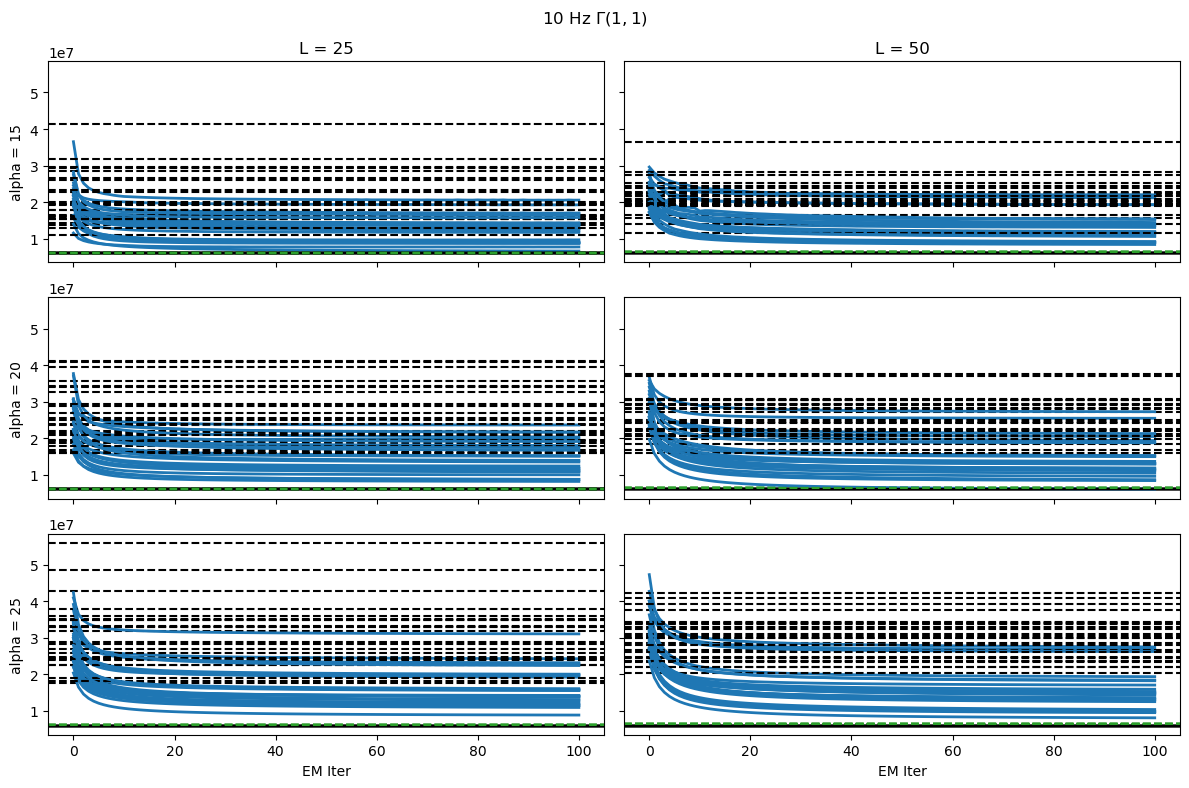

In [54]:
jind = 0
jind_full = 9
ijs = [[k,k] for k in range(K)]
k = 1 

i,j = ijs[k]
# def func(x):
#     return 10*jnp.log10(jnp.real(x))
func = jnp.real
fig, ax = plt.subplots(alphas.size, Ls.size, figsize=(12,8), sharex=True, sharey=True)
for l, L in enumerate(Ls):
    for a, alpha in enumerate(alphas):
        
        lsel = {'L': L}
        osel = {'alpha': alpha}
        res = filter_loaded(res_load, lsel, msel, osel)
        cfg = res['cfg']
        gamma_true = res['gamma_true_full']

        for k in range(K):
            plot_cross_spec_func_em_iters(ax[a,l], func, k,k, res['track']['gamma'], res['gamma_init'], j_ind = jind)
            ax[a,l].axhline(func(res['gamma_true_full'][jind_full,k,k]), color='k')
            ax[a,l].axhline(func(naive_ests[l,a,jind,k,k]), linestyle='--', color='k')
            ax[a,l].axhline(func(oracle_ests[l,a,jind,k,k]), linestyle='--', color='tab:green')
        if l == 0:
            ax[a,l].set_ylabel(f'alpha = {alpha}')
        if a == 0:
            ax[a,l].set_title(f'L = {L}')
        if a == alphas.size-1:
            ax[a,l].set_xlabel('EM Iter')
fig.suptitle(f'{nz_model[jind]+1} Hz ' + rf'$\Gamma({i}, {j})$')
plt.tight_layout()

Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.


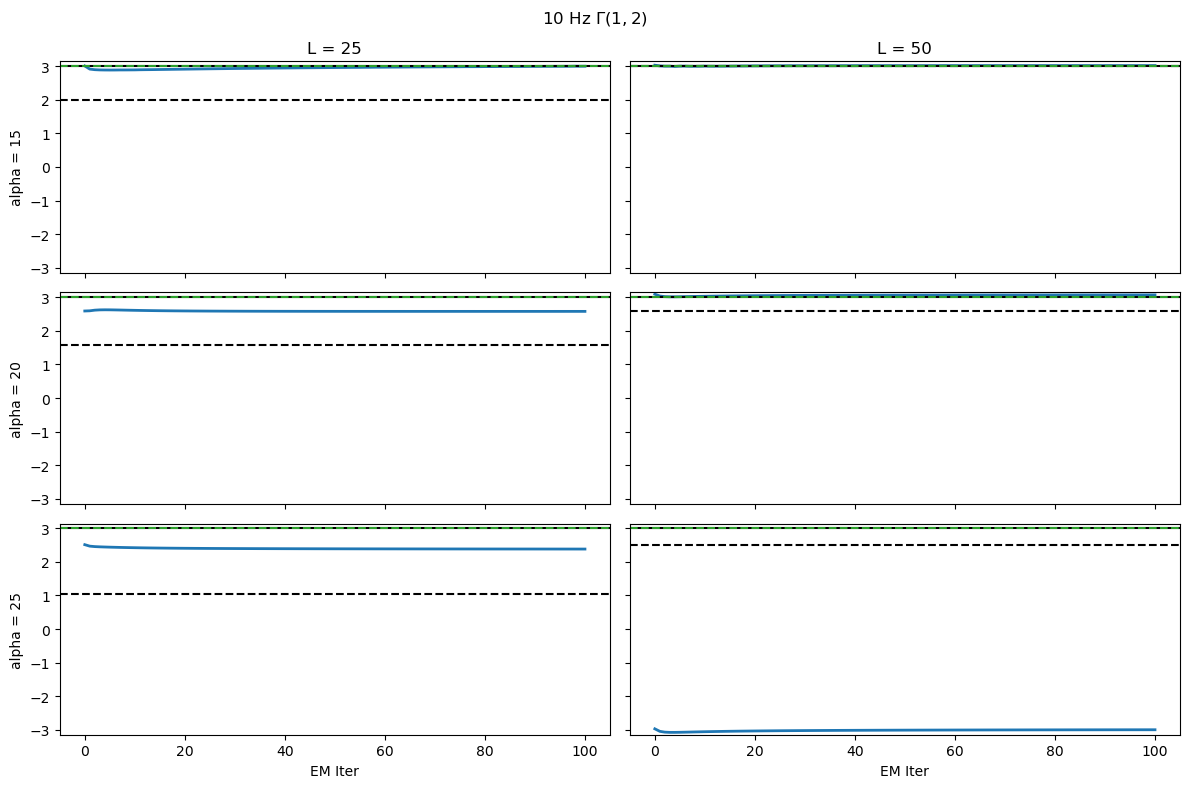

In [55]:
ijs = [[0,1], [0,2], [1,2]]
i,j = ijs[2]
func = jnp.angle

fig, ax = plt.subplots(alphas.size, Ls.size, figsize=(12,8), sharex=True, sharey=True)
for l, L in enumerate(Ls):
    for a, alpha in enumerate(alphas):
        
        lsel = {'L': L}
        osel = {'alpha': alpha}
        res = filter_loaded(res_load, lsel, msel, osel)
        cfg = res['cfg']
        gamma_true = res['gamma_true_full']

        plot_cross_spec_func_em_iters(ax[a,l], func, i,j, res['track']['gamma'], res['gamma_init'], j_ind = jind)
        ax[a,l].axhline(func(res['gamma_true_full'][jind_full,i,j]), color='k')
        ax[a,l].axhline(func(naive_ests[l,a,jind,i,j]), linestyle='--', color='k')
        ax[a,l].axhline(func(oracle_ests[l,a,jind,i,j]), linestyle='--', color='tab:green')
        if l == 0:
            ax[a,l].set_ylabel(f'alpha = {alpha}')
        if a == 0:
            ax[a,l].set_title(f'L = {L}')
        if a == alphas.size-1:
            ax[a,l].set_xlabel('EM Iter')

        ax[a,l].set_ylim([-jnp.pi, jnp.pi])
fig.suptitle(f'{nz_model[jind]+1} Hz ' + rf'$\Gamma({i}, {j})$')
plt.tight_layout()

Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.


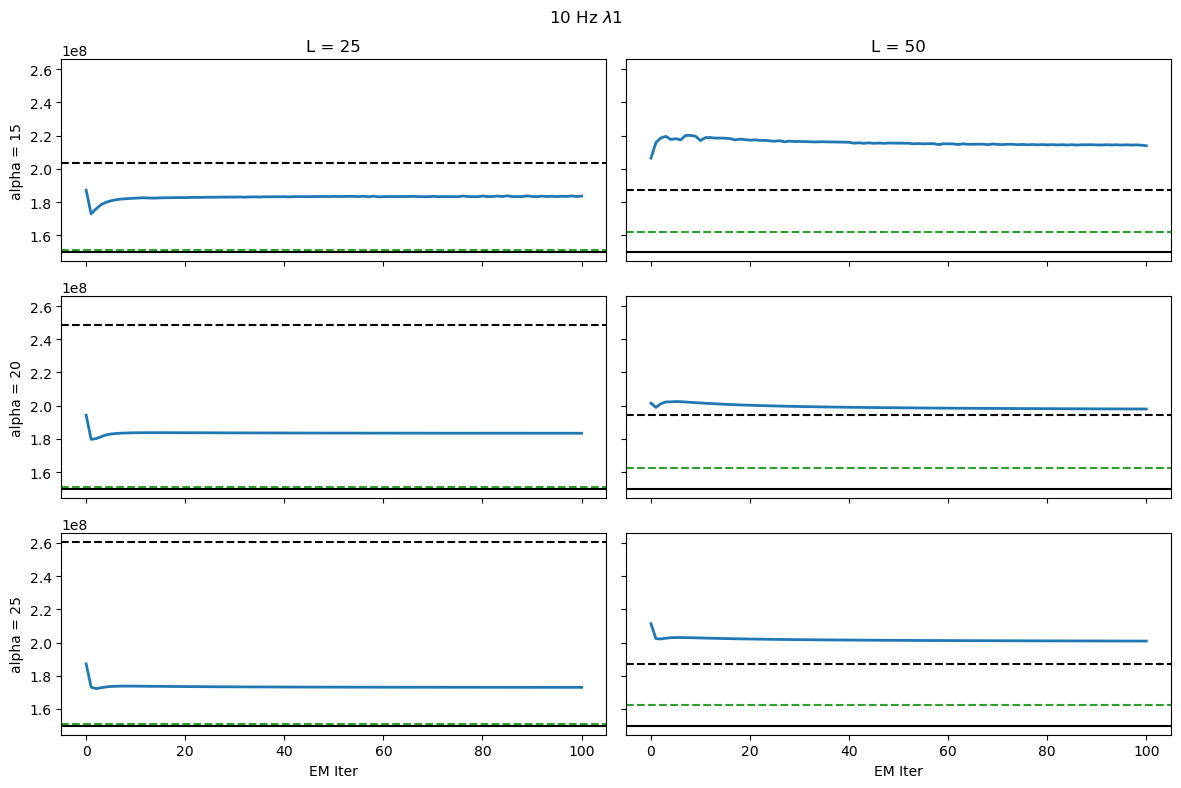

In [56]:
eigrank = 1
fig, ax = plt.subplots(alphas.size, Ls.size, figsize=(12,8), sharex=True, sharey=True)
for l, L in enumerate(Ls):
    for a, alpha in enumerate(alphas):
        
        lsel = {'L': L}
        osel = {'alpha': alpha}
        res = filter_loaded(res_load, lsel, msel, osel)
        cfg = res['cfg']
        gamma_true = res['gamma_true_full']

        true_eigval = get_eigval(gamma_true[jind_full,:,:], eigrank)

        gamma_naive = naive_ests[l,a,:,:,:]
        gamma_oracle = oracle_ests[l,a,:,:,:]

        oracle_eigval = get_eigval(gamma_oracle[jind,:,:], eigrank)
        naive_eigval = get_eigval(gamma_naive[jind,:,:], eigrank)

        plot_cross_spec_eigval_em_iters(ax[a,l], eigrank, res['track']['gamma'], res['gamma_init'], j_ind=jind)
        ax[a,l].axhline(true_eigval, color='k')
        ax[a,l].axhline(naive_eigval, linestyle='--', color='k')
        ax[a,l].axhline(oracle_eigval, linestyle='--', color='tab:green')

        if l == 0:
            ax[a,l].set_ylabel(f'alpha = {alpha}')
        if a == 0:
            ax[a,l].set_title(f'L = {L}')
        if a == alphas.size-1:
            ax[a,l].set_xlabel('EM Iter')

fig.suptitle(f'{nz_model[jind]+1} Hz ' + rf'$\lambda {eigrank}$')
plt.tight_layout()

Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.


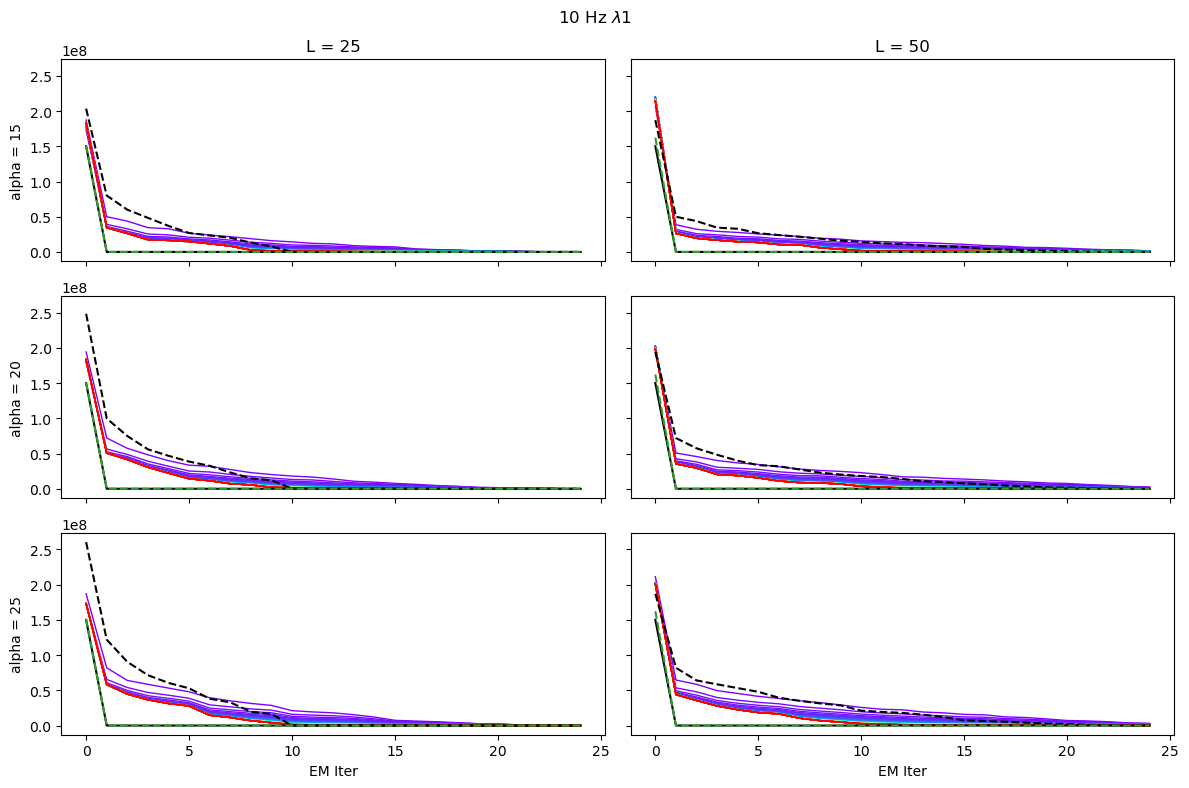

In [57]:
eigrank = 1
fig, ax = plt.subplots(alphas.size, Ls.size, figsize=(12,8), sharex=True, sharey=True)
for l, L in enumerate(Ls):
    for a, alpha in enumerate(alphas):
        
        lsel = {'L': L}
        osel = {'alpha': alpha}
        res = filter_loaded(res_load, lsel, msel, osel)
        cfg = res['cfg']

        gamma_true = res['gamma_true_full']
        gamma_oracle = oracle_ests[l,a,:,:,:]
        gamma_naive = naive_ests[l,a,:,:,:]
        gamma_est = res['gamma']

        evs_true, _ = jnp.linalg.eigh(gamma_true[jind_full,:,:])
        evs_oracle, _ = jnp.linalg.eigh(gamma_oracle[jind_full,:,:])
        evs_naive, _ = jnp.linalg.eigh(gamma_naive[jind_full,:,:])
        evs_est, _ = jnp.linalg.eigh(gamma_est[jind_full,:,:])

        plot_eigvals_em_iters(ax[a,l], res['track']['gamma'], res['gamma_init'], j_ind=jind)
        ax[a,l].plot(evs_true[::-1], color='k')
        ax[a,l].plot(evs_naive[::-1], linestyle='--', color='k')
        ax[a,l].plot(evs_oracle[::-1], linestyle='--', color='tab:green')

        if l == 0:
            ax[a,l].set_ylabel(f'alpha = {alpha}')
        if a == 0:
            ax[a,l].set_title(f'L = {L}')
        if a == alphas.size-1:
            ax[a,l].set_xlabel('EM Iter')

fig.suptitle(f'{nz_model[jind]+1} Hz ' + rf'$\lambda {eigrank}$')
plt.tight_layout()

Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.


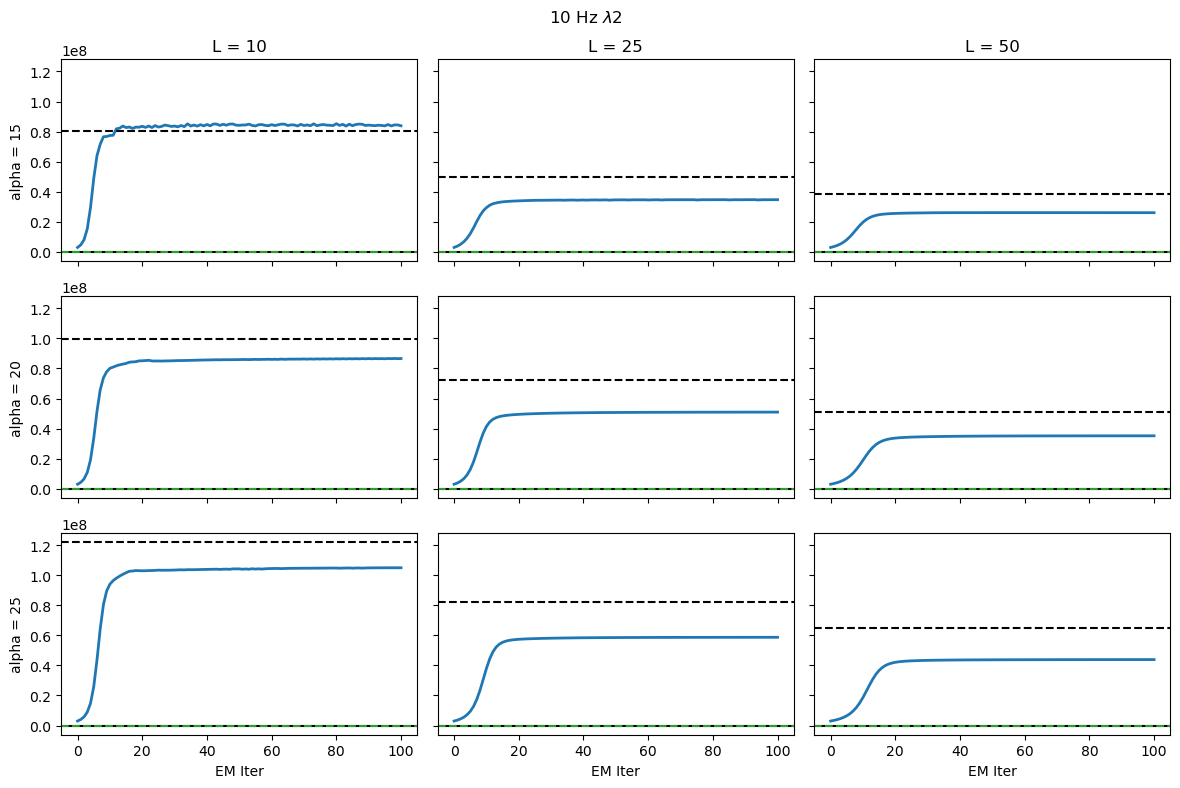

In [34]:
eigrank = 2
fig, ax = plt.subplots(alphas.size, Ls.size, figsize=(12,8), sharex=True, sharey=True)
for l, L in enumerate(Ls):
    for a, alpha in enumerate(alphas):
        
        lsel = {'L': L}
        osel = {'alpha': alpha}
        res = filter_loaded(res_load, lsel, msel, osel)
        cfg = res['cfg']
        gamma_true = res['gamma_true_full']

        true_eigval = get_eigval(gamma_true[jind_full,:,:], eigrank)

        gamma_naive = naive_ests[l,a,:,:,:]
        gamma_oracle = oracle_ests[l,a,:,:,:]

        oracle_eigval = get_eigval(gamma_oracle[jind,:,:], eigrank)
        naive_eigval = get_eigval(gamma_naive[jind,:,:], eigrank)

        plot_cross_spec_eigval_em_iters(ax[a,l], eigrank, res['track']['gamma'], res['gamma_init'], j_ind=jind)
        ax[a,l].axhline(true_eigval, color='k')
        ax[a,l].axhline(naive_eigval, linestyle='--', color='k')
        ax[a,l].axhline(oracle_eigval, linestyle='--', color='tab:green')

        if l == 0:
            ax[a,l].set_ylabel(f'alpha = {alpha}')
        if a == 0:
            ax[a,l].set_title(f'L = {L}')
        if a == alphas.size-1:
            ax[a,l].set_xlabel('EM Iter')

fig.suptitle(f'{nz_model[jind]+1} Hz ' + rf'$\lambda {eigrank}$')
plt.tight_layout()

Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.
Returned single result.


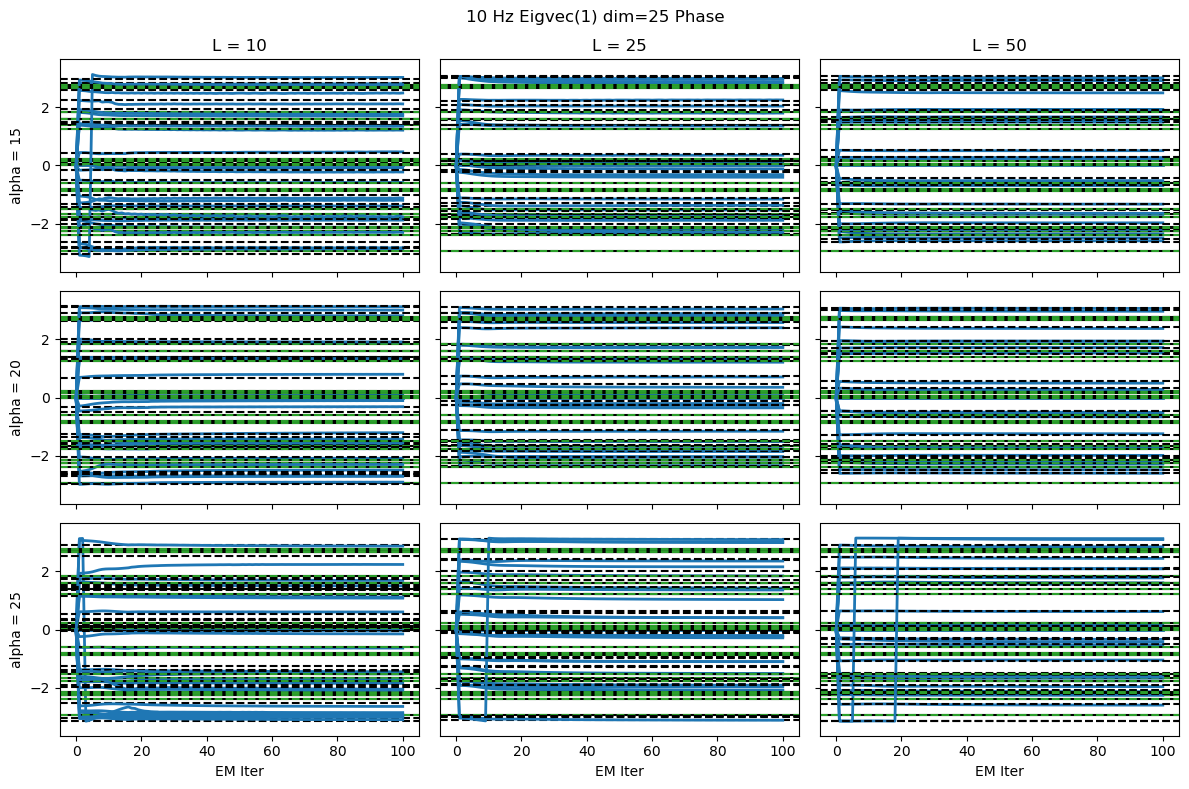

In [30]:
eigrank = 1
func = jnp.angle
z = 0
dims = jnp.array([0,1,2]) + 3*z
dims = jnp.arange(K)
fig, ax = plt.subplots(alphas.size, Ls.size, figsize=(12,8), sharex=True, sharey=True)
for l, L in enumerate(Ls):
    for a, alpha in enumerate(alphas):
        
        lsel = {'L': L}
        osel = {'alpha': alpha}
        res = filter_loaded(res_load, lsel, msel, osel)
        cfg = res['cfg']
        gamma_true = res['gamma_true_full']


        gamma_naive = naive_ests[l,a,:,:,:]
        gamma_oracle = oracle_ests[l,a,:,:,:]

        true_eigvec = get_eigvec(gamma_true[jind_full,:,:], eigrank)
        oracle_eigvec = get_eigvec(gamma_oracle[jind,:,:], eigrank)
        naive_eigvec = get_eigvec(gamma_naive[jind,:,:], eigrank)

        for dim in dims:
            plot_eigvec_func_em_iters(ax[a,l], func, eigrank, dim, res['track']['gamma'], res['gamma_init'], j_ind=9)
            ax[a,l].axhline(func(true_eigvec[dim]), color='k')
            ax[a,l].axhline(func(naive_eigvec[dim]), linestyle='--', color='k')
            ax[a,l].axhline(func(oracle_eigvec[dim]), linestyle='--', color='tab:green')


        if l == 0:
            ax[a,l].set_ylabel(f'alpha = {alpha}')
        if a == 0:
            ax[a,l].set_title(f'L = {L}')
        if a == alphas.size-1:
            ax[a,l].set_xlabel('EM Iter')
        ax[a,l].set_ylim([-jnp.pi - 0.5, jnp.pi + 0.5])

fig.suptitle(f'{nz_model[jind]+1} Hz ' + rf'Eigvec({eigrank}) dim={dim+1} Phase')
plt.tight_layout()